In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics
import seaborn as sns
import random
from pandas import plotting

In [4]:
random.seed(1)


In [5]:
Part_chro=['13','22','10', '18']
Part_reco=['19','20','02','09']

In [6]:
#areas=['FC','FP','FO','FT','TO','TC','TP','PO','PC','CO','FF','CC','PP','TT','OO']

#data=pd.read_pickle('data/NEW_wPLI_all_10_1_left_theta.pickle')
data=pd.read_pickle('data/WholeBrain_wPLI_10_1_alpha.pickle')
areas=data.columns[4:]
                    

In [7]:
#chronic 0
data.insert(0, 'outcome', "0")


# %%
for p in Part_reco:
    data.iloc[np.where(data['ID'] == p)[0],0] = "1"
   

In [8]:
grouped_data=data.groupby('outcome')

plotting.scatter_matrix(data[areas],c=data['outcome'])
fig=plt.gcf()
plt.show()

In [9]:
data_Base=data[(data['Phase'] == 'Base')]
data_Anes=data[(data['Phase'] == 'Anes')]
data_Reco=data[(data['Phase'] == 'Reco')]

In [10]:
"
plt.rcParams['figure.figsize'] = [20, 15]
plotting.scatter_matrix(data_Base[areas],c=(data_Base['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Baseline violet: chronic   yellow: recovered', fontsize=16)
plt.show()
plt.savefig('wPLI_Theta_scatter_Base.png',dpi=150)
"

SyntaxError: EOL while scanning string literal (<ipython-input-10-6a6c4e3bfcac>, line 1)

In [ ]:
"plotting.scatter_matrix(data_Anes[areas],c=(data_Anes['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Anesthesia violet: chronic   yellow: recovered', fontsize=16)
plt.show()
plt.savefig('wPLI_Theta_scatter_Anes.png',dpi=150)"

In [ ]:
"plotting.scatter_matrix(data_Reco[areas],c=(data_Reco['outcome']=="1"))
fig=plt.gcf()
fig.suptitle('wPLI_Theta Reco violet: chronic   yellow: recovered', fontsize=16)
plt.show()
"


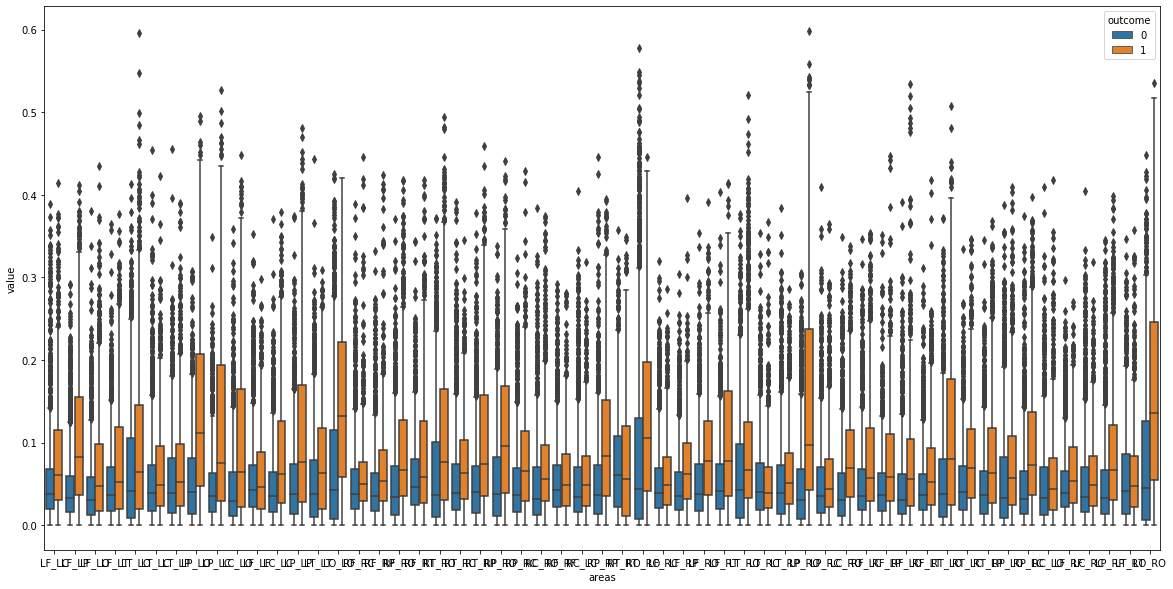

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
dd=pd.melt(data_Base,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Base.png',dpi=150)
#data_Base.groupby('outcome').boxplot(column=areas)


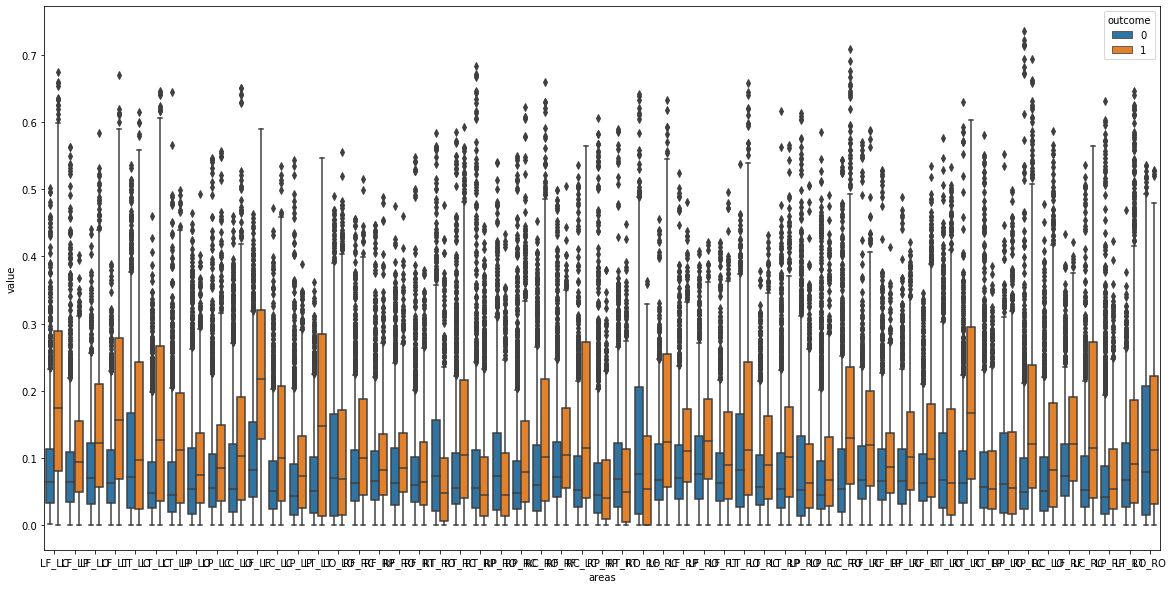

In [12]:
dd=pd.melt(data_Anes,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Anes.png',dpi=150)
#data_Anes.groupby('outcome').boxplot(column=areas)


In [ ]:
#dd=pd.melt(data_Anes,id_vars=['ID'],value_vars='FF',var_name='areas')
#sns.boxplot(x='areas',y='value',data=dd,hue='ID')

In [ ]:
dd=pd.melt(data_Reco,id_vars=['outcome'],value_vars=areas,var_name='areas')
sns.boxplot(x='areas',y='value',data=dd,hue='outcome')
plt.savefig('wPLI_Theta_box_Reco.png',dpi=150)
#data_Reco.groupby('outcome').boxplot(column=areas)


In [ ]:
data_Anes

In [ ]:
from scipy.stats import ttest_ind

p_diff_Anes=[]
cat1 = data_Anes[(data_Anes['ID'] == '13') | (data_Anes['ID'] == '22') | (data_Anes['ID'] == '10') | (data_Anes['ID'] == '18')]
cat2 = data_Anes[(data_Anes['ID'] == '19') | (data_Anes['ID'] == '20') | (data_Anes['ID'] == '02') | (data_Anes['ID'] == '09')]
#cat2 = data_Anes[data_Anes['outcome']==1]

for a in areas:
    p_diff_Anes.append([a,ttest_ind(cat1[a], cat2[a],equal_var=False)])
    

In [ ]:
p_diff_Anes